In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)
path = './tmp/mnist.npz'
# the data, split between train and test sets

# with np.load(path, allow_pickle=True) as f:
#     x_train, y_train = f['x_train'], f['y_train']
#     x_test, y_test = f['x_test'], f['y_test']

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
# x_train = x_train.astype("float32") / 255
# x_test = x_test.astype("float32") / 255

x_train = keras.utils.normalize(x_train, axis = 1)
x_test = keras.utils.normalize(x_test, axis = 1)

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
# # Model / data parameters
# # FOR THE CIFAR DATASET
# num_classes = 10
# input_shape = (32,32, 3)
# path = './tmp/mnist.npz'
# # the data, split between train and test sets

# # with np.load(path, allow_pickle=True) as f:
# #     x_train, y_train = f['x_train'], f['y_train']
# #     x_test, y_test = f['x_test'], f['y_test']

# (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# # Scale images to the [0, 1] range
# # x_train = x_train.astype("float32") / 255
# # x_test = x_test.astype("float32") / 255

# x_train = keras.utils.normalize(x_train, axis = 1)
# x_test = keras.utils.normalize(x_test, axis = 1)

# x_train = np.expand_dims(x_train, -1)
# x_test = np.expand_dims(x_test, -1)

# print("x_train shape:", x_train.shape)
# print(x_train.shape[0], "train samples")
# print(x_test.shape[0], "test samples")


# # convert class vectors to binary class matrices
# # y_train = keras.utils.to_categorical(y_train, num_classes)
# # y_test = keras.utils.to_categorical(y_test, num_classes)

In [12]:
# # # policy = keras.mixed_precision.Policy('float16')
# # # keras.mixed_precision.set_global_policy(policy)

model = keras.Sequential()

model.add(keras.Input(shape=input_shape))
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(num_classes, activation="softmax"))

model.build(input_shape)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [5]:
# trying a different architecture

# model = keras.Sequential()

# model.add(keras.Input(shape=input_shape))
# model.add(layers.Conv2D(1, kernel_size=(3, 3), activation="relu"))
# # model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))
# model.add(layers.Conv2D(48, kernel_size=(3, 3), activation="relu"))
# model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
# model.add(layers.Conv2D(80, kernel_size=(3, 3), activation="relu"))
# model.add(layers.Conv2D(96, kernel_size=(3, 3), activation="relu"))
# model.add(layers.Conv2D(112, kernel_size=(3, 3), activation="relu"))
# model.add(layers.Conv2D(128, kernel_size=(3, 3), activation="relu"))
# model.add(layers.Conv2D(144, kernel_size=(3, 3), activation="relu"))
# model.add(layers.Conv2D(160, kernel_size=(3, 3), activation="relu"))
# # model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(num_classes, activation="softmax"))

# model.build(input_shape)
# model.summary()

In [13]:
import keras.backend as K

def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", f1_metric])

history_adam = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 9s 20ms/step - loss: 0.3989 - accuracy: 0.8838 - f1_metric: 0.8512 - val_loss: 0.1158 - val_accuracy: 0.9673 - val_f1_metric: 0.9693
Epoch 2/15
422/422 [==============================] - 8s 20ms/step - loss: 0.1286 - accuracy: 0.9608 - f1_metric: 0.9612 - val_loss: 0.0782 - val_accuracy: 0.9785 - val_f1_metric: 0.9787
Epoch 3/15
422/422 [==============================] - 8s 20ms/step - loss: 0.0967 - accuracy: 0.9705 - f1_metric: 0.9712 - val_loss: 0.0705 - val_accuracy: 0.9792 - val_f1_metric: 0.9794
Epoch 4/15
422/422 [==============================] - 8s 20ms/step - loss: 0.0786 - accuracy: 0.9756 - f1_metric: 0.9759 - val_loss: 0.0542 - val_accuracy: 0.9848 - val_f1_metric: 0.9847
Epoch 5/15
422/422 [==============================] - 8s 20ms/step - loss: 0.0683 - accuracy: 0.9792 - f1_metric: 0.9793 - val_loss: 0.0497 - val_accuracy: 0.9867 - val_f1_metric: 0.9867
Epoch 6/15
422/422 [==============================] - 8s 20ms/ste

In [14]:
model.save("./models/cnn_mnist")

INFO:tensorflow:Assets written to: ./models/cnn_mnist\assets


INFO:tensorflow:Assets written to: ./models/cnn_mnist\assets


In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03398650512099266
Test accuracy: 0.9890999794006348


In [9]:
# model.save("./tmp/CNNmodel9CONV")

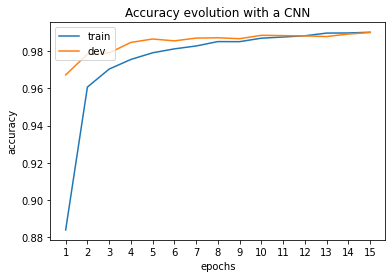

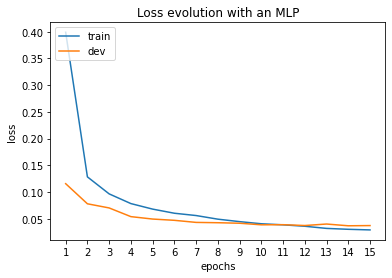

In [16]:
epochs = [i for i in range(1,16)]
epochs_ticks = [i for i in range(1,16)]
# Accuracy
fig1, ax1 = plt.subplots()
ax1.set_xticks(epochs_ticks)
plt.plot(epochs, history_adam.history["accuracy"])
plt.plot(epochs, history_adam.history["val_accuracy"])
plt.title("Accuracy evolution with a CNN")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(["train", "dev"], loc = "upper left")
plt.show()

# plt.plot(history_adam.history["f1_metric"])
# plt.plot(history_adam.history["val_f1_metric"])
# plt.title("Model F1 score")
# plt.ylabel("F1 Score")
# plt.xlabel("epochs")
# plt.legend(["train", "dev"], loc = "upper left")
# plt.show()

# Loss
fig3, ax3 = plt.subplots()
ax3.set_xticks(epochs_ticks)
plt.plot(epochs, history_adam.history["loss"])
plt.plot(epochs, history_adam.history["val_loss"])
plt.title("Loss evolution with an MLP")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend(["train", "dev"], loc = "upper left")
plt.show()

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Before changing the weights and biases")
print("Test loss:", score[0])
print("Test accuracy:", score[1])

layers = []
print(model.layers[1].get_weights()[0][0][0:5])
print("before")
for i in range(len(model.layers)):
    weights_biases_of_layer = model.layers[i].get_weights()
    if i == 0:
        continue
    weight_matrix = weights_biases_of_layer[0]
    bias_matrix = weights_biases_of_layer[1]
    weights16 = weight_matrix.astype(np.float16)
    bias16 = bias_matrix.astype(np.float16)
    layer_weights = []
    layer_weights.append(weights16)
    layer_weights.append(bias16)
    layers.append(layer_weights)
    if i==1:
        print(layer_weights[0][0][0:5])

# print(layer_weights[0][0][0:5])
# # model.layers[i].set_weights(layer_weights)
# print(layer_weights[0][0][0:5])

for i in range(1,len(model.layers)):
    model.layers[i].set_weights(layers[i-1])


# print(model.layers[1].get_weights()[0])
# weights = np.zeros(model.layers[1].get_weights()[0].shape)
# biases = np.zeros(model.layers[1].get_weights()[1].shape)
# layer = []
# layer.append(weights)
# layer.append(biases)
# model.layers[1].set_weights(layer)

print(model.layers[1].get_weights()[0][0][0:5])

# print(model.layers[1].get_weights()[0].shape)
# print(model.layers[1].get_weights()[0][0])
# print(model.layers[1].get_weights()[0][0].astype(np.float16))

score = model.evaluate(x_test, y_test, verbose=0)
print("After changing the weights and biases to float16")
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Before changing the weights and biases
Test loss: 0.05048751085996628
Test accuracy: 0.984000027179718


IndexError: list index out of range

In [ ]:
test = np.random.randn(3,3)*10
print(test)
print(test.astype(np.float16))

[[-1.52705205 -6.19707207 -2.90604668]
 [ 3.93396562 -2.51871285 16.55104561]
 [-8.79640342  4.10214129 -0.03546301]]
[[-1.527   -6.195   -2.906  ]
 [ 3.934   -2.52    16.55   ]
 [-8.8      4.1     -0.03546]]


In [ ]:
# model.compile(loss="categorical_crossentropy", metrics=["accuracy", f1_metric])

# history_gd = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy", f1_metric])

# history_mom = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

In [ ]:
def plotGraphics(history_given, optimizer):
    plt.plot(history_given.history["accuracy"])
    plt.plot(history_given.history["val_accuracy"])
    plt.title("Model with " + optimizer +   ": Accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend(["train", "dev"], loc = "upper left")
    plt.show()

    plt.plot(history_given.history["f1_metric"])
    plt.plot(history_given.history["val_f1_metric"])
    plt.title("Model F1 score")
    plt.ylabel("F1 Score")
    plt.xlabel("epochs")
    plt.legend(["train", "dev"], loc = "upper left")
    plt.show()

    plt.plot(history_given.history["loss"])
    plt.plot(history_given.history["val_loss"])
    plt.title("Model Loss")
    plt.ylabel("Loss")
    plt.xlabel("epochs")
    plt.legend(["train", "dev"], loc = "upper left")
    plt.show()

In [ ]:
# plotGraphics(history_gd, "Gradient Descent")
# plotGraphics(history_adam, "Adam")
# plotGraphics(history_mom, "Momentum")

In [ ]:
import tensorflow_model_optimization as tfmot

quantize_model = tfmot.quantization.keras.quantize_model

# q_aware stands for for quantization aware.
# using the initial model made and fine tuning it
q_aware_model = quantize_model(model)

# `quantize_model` requires a recompile.
q_aware_model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy', f1_metric])

q_aware_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantize_layer (QuantizeLay  (None, 28, 28, 1)        3         
 er)                                                             
                                                                 
 quant_conv2d (QuantizeWrapp  (None, 26, 26, 32)       387       
 erV2)                                                           
                                                                 
 quant_max_pooling2d (Quanti  (None, 13, 13, 32)       1         
 zeWrapperV2)                                                    
                                                                 
 quant_conv2d_1 (QuantizeWra  (None, 11, 11, 64)       18627     
 pperV2)                                                         
                                                                 
 quant_max_pooling2d_1 (Quan  (None, 5, 5, 64)         1

In [ ]:
train_images_subset = x_train[0:10000] # out of 60000
train_labels_subset = y_train[0:10000]

# quantization-aware model which means we will do fine tuning by training this new model after having changed the weights and baises representation
q_aware_model.fit(train_images_subset, train_labels_subset,
                  batch_size=128, epochs=5, validation_split=0.1)

Epoch 1/5
71/71 [==============================] - 3s 38ms/step - loss: 0.0370 - accuracy: 0.9884 - f1_metric: 0.9886 - val_loss: 0.0207 - val_accuracy: 0.9940 - val_f1_metric: 0.9936
Epoch 2/5
71/71 [==============================] - 3s 36ms/step - loss: 0.0290 - accuracy: 0.9914 - f1_metric: 0.9914 - val_loss: 0.0218 - val_accuracy: 0.9930 - val_f1_metric: 0.9922
Epoch 3/5
71/71 [==============================] - 3s 39ms/step - loss: 0.0310 - accuracy: 0.9897 - f1_metric: 0.9896 - val_loss: 0.0244 - val_accuracy: 0.9930 - val_f1_metric: 0.9922
Epoch 4/5
71/71 [==============================] - 3s 39ms/step - loss: 0.0297 - accuracy: 0.9907 - f1_metric: 0.9904 - val_loss: 0.0266 - val_accuracy: 0.9910 - val_f1_metric: 0.9912
Epoch 5/5
71/71 [==============================] - 3s 43ms/step - loss: 0.0262 - accuracy: 0.9918 - f1_metric: 0.9916 - val_loss: 0.0258 - val_accuracy: 0.9910 - val_f1_metric: 0.9917


In [ ]:
evaluation_basic_model = model.evaluate(
    x_test, y_test, verbose=0)

evaluation_q_model = q_aware_model.evaluate(
   x_test, y_test, verbose=0)

print('Baseline test accuracy:', evaluation_basic_model[1])
print('Quantized test accuracy:', evaluation_q_model[1])

Baseline test accuracy: 0.9901999831199646
Quantized test accuracy: 0.9879999756813049


In [ ]:
print(model.layers[0].get_weights()[0][0][0])
print(q_aware_model.layers[0].get_weights())

[[ 0.34290493  0.55854875 -0.30646303 -0.6363894   0.02036654  0.45957482
   0.15502532  0.07763515 -0.04157272  0.02476565  0.18095592  0.27630594
   0.13768297  0.03411715  0.12689507  0.01090439 -0.20978925 -0.70086473
   0.02883367 -0.24217355  0.00843705 -0.44436064  0.10103899 -0.6532718
   0.38190174  0.061298    0.19637986  0.08345451 -0.0183505   0.17455162
   0.27734765  0.02330555]]
[0.0, 1.0, -1]
